In [5]:
import numpy as np
import matplotlib.pyplot as plt

from experiment.toolkits.plotting_helper import *

Spectrogram of the entire plot

In [6]:
address = "../resources/wfm_txt/result.txt"
sr = 624e6
T = 100e-6
with open(address, "r") as file:
    line = file.readlines()[0]

nums = np.array([float(n) for n in line.split(",")[:-1]])

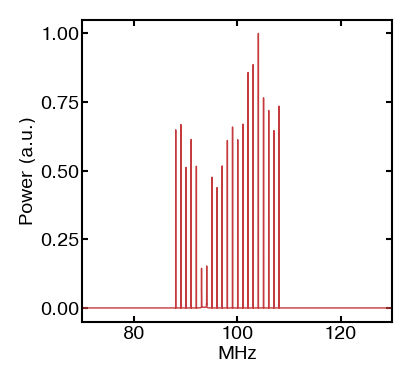

In [8]:
xvals = np.sort(np.fft.fftfreq(len(nums), d=1/sr))
yvals = np.abs(np.fft.fftshift(np.fft.fft(nums)))**2
yvals /= yvals.max()

fig, ax = getStylishFigureAxes(1, 1)

PlotPlotter(
    fig,
    ax,
    xvals/1e6, 
    yvals,
    xlabel = "MHz",
    ylabel = "Power (a.u.)",
    style = {"lw": 0.5}
).draw()

ax.set_xlim([70, 130])

plt.show()

Spectogram

In [15]:
nums = np.array([float(n) for n in line.split(",")[:-1]])
sections = 5
size = len(nums) // sections

xvals = np.sort(np.fft.fftfreq(len(nums)//sections, d=1/sr))
yvals_section = np.full((len(xvals), sections), np.nan)
for i in range(sections):
    yvals_section[:, i] = np.abs(np.fft.fftshift(np.fft.fft(nums[i*size:i*size+size])))**2

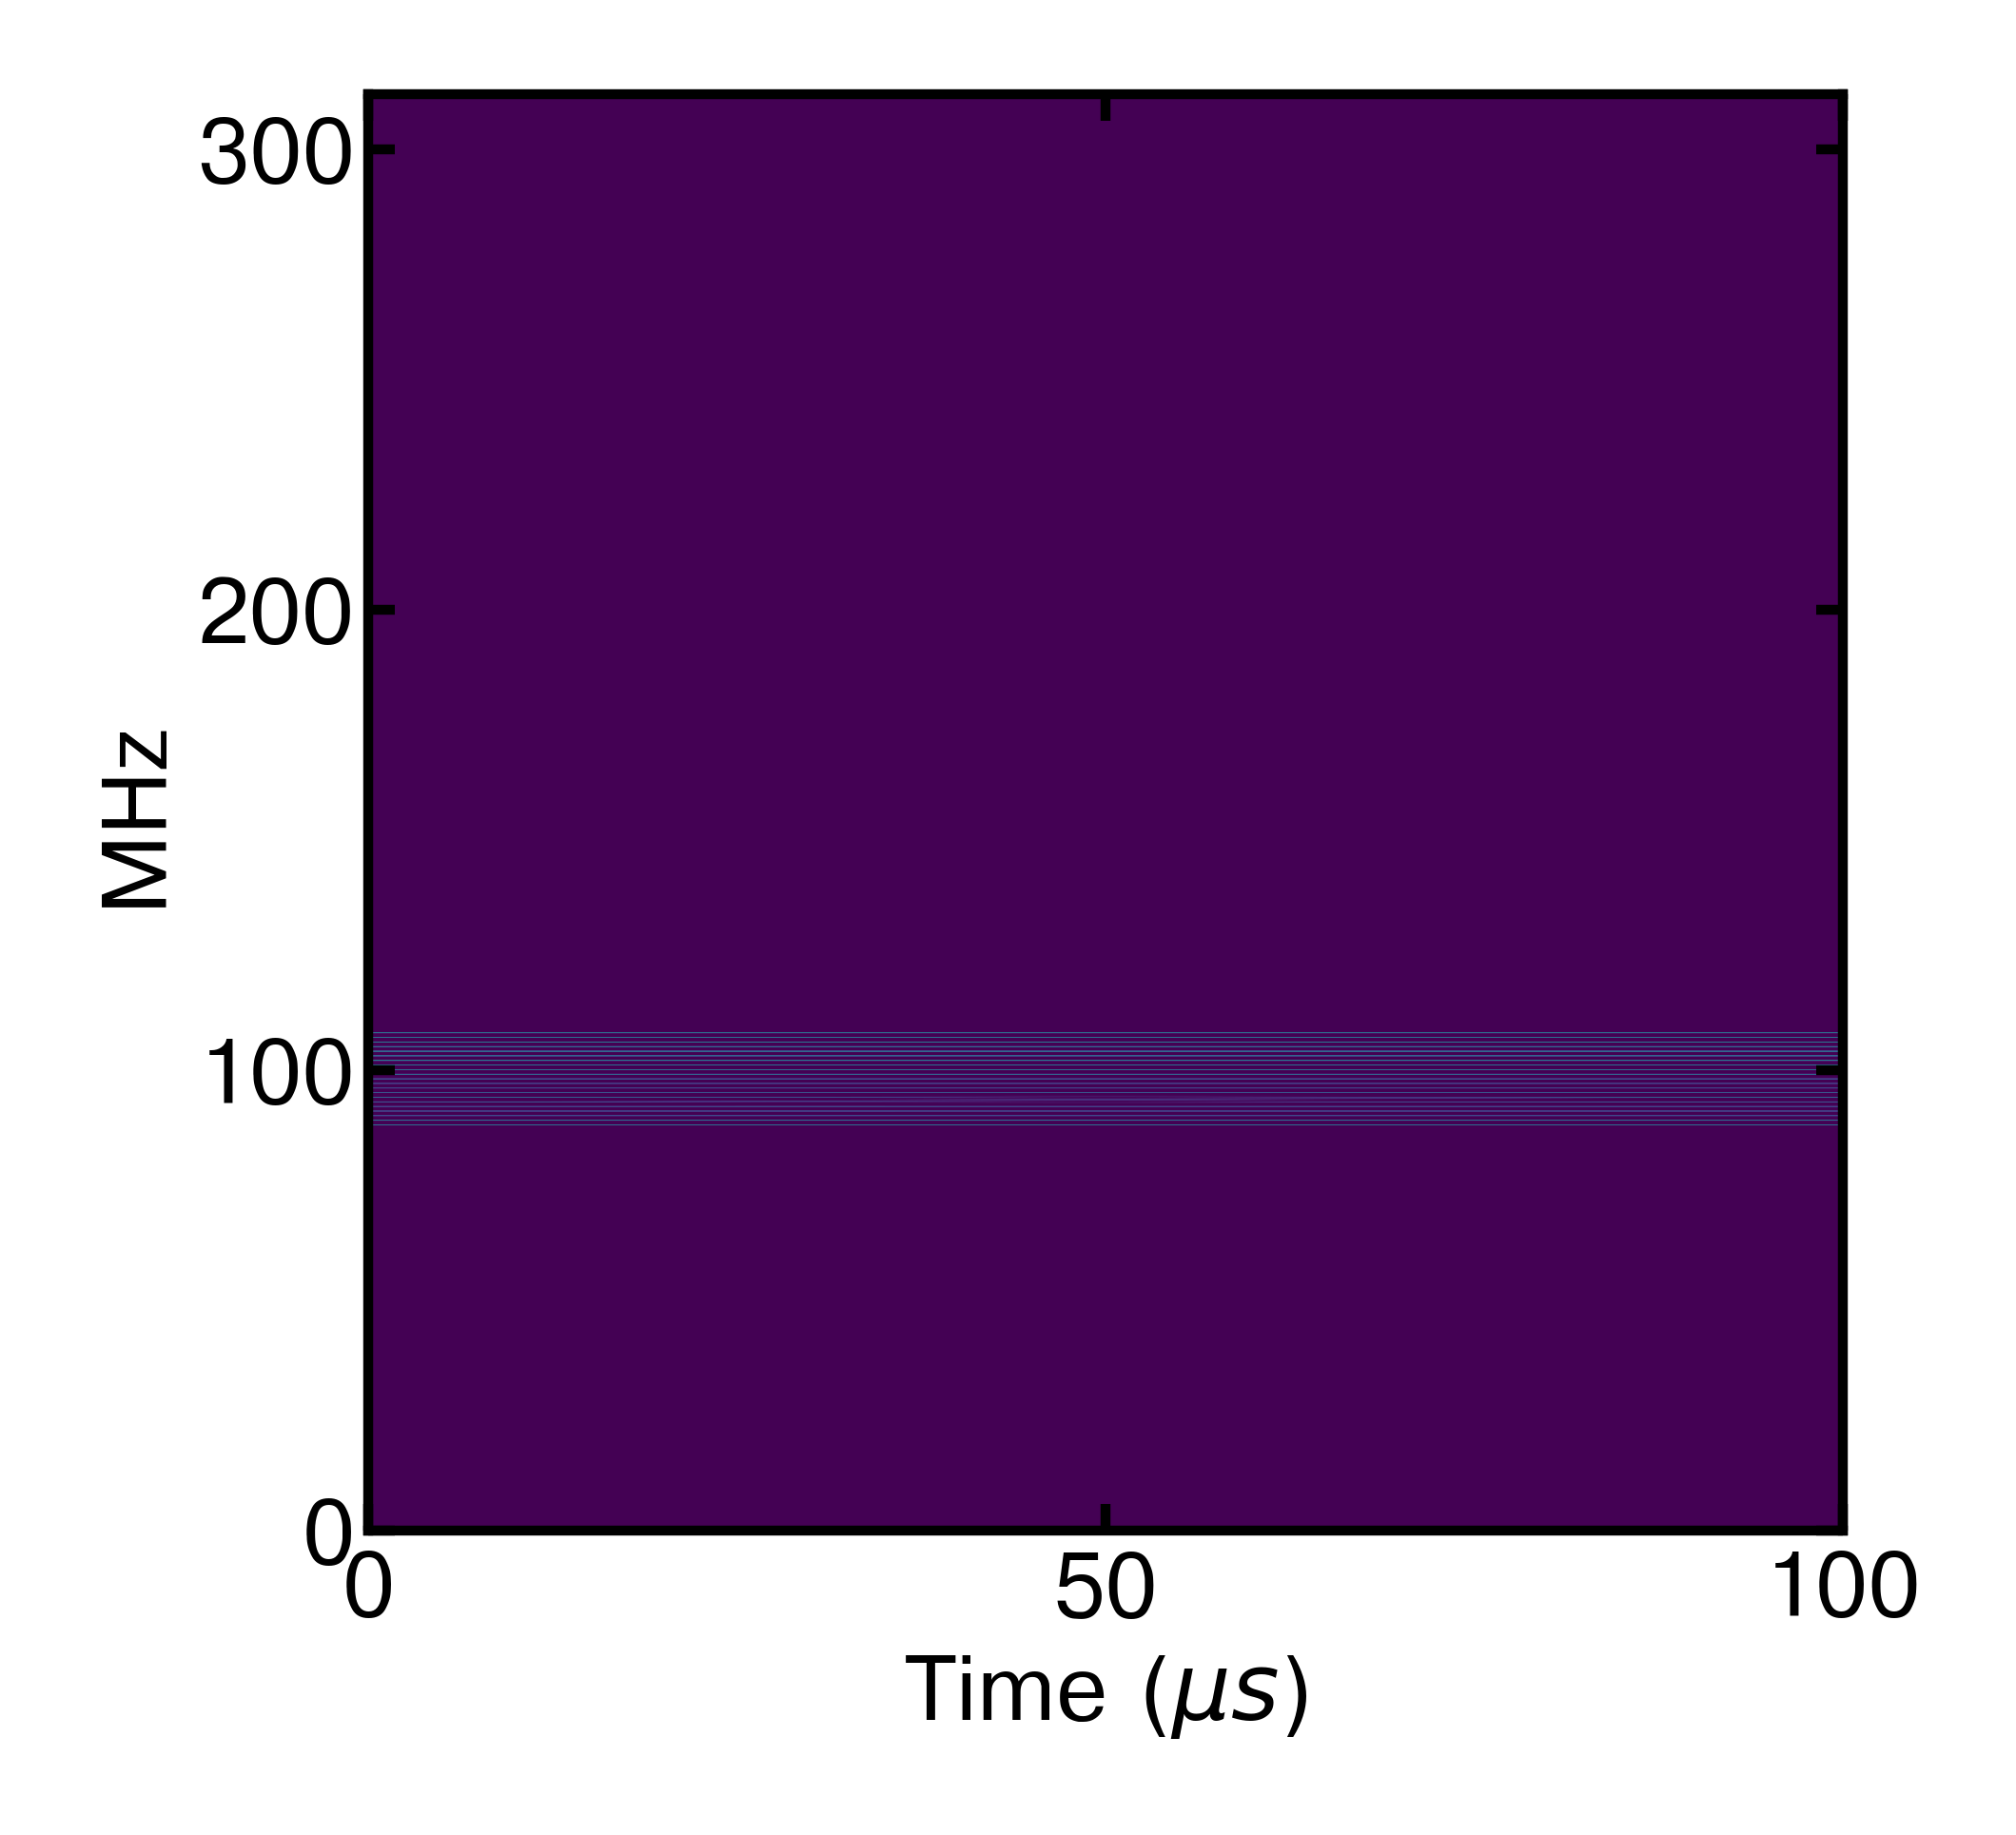

In [17]:
fig, ax = getStylishFigureAxes(1, 1, dpi=1000)

ImagePlotter(
    fig,
    ax,
    yvals_section[yvals_section.shape[0]//2:, :],
    False,
    style = {
        "extent": [0, T*1e6, 0, xvals[-1]/1e6],
        "vmin": 0,
        "vmax": 5*1e13
    },
    xlabel = "Time ($\mu s$)",
    ylabel = "MHz"
).draw()

ax.set_aspect('auto')

plt.show()